In [ ]:
# Breast Cancer Data Set

In [28]:
# importing important libraries

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout

In [2]:
# loading data set from colab

from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [5]:
# reading the data set

df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# checking for missing values

df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [8]:
# removing unnecessary columns

df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.shape

(569, 31)

In [13]:
# Class distribution
df['diagnosis'].value_counts()


,count
diagnosis,
B,357
M,212


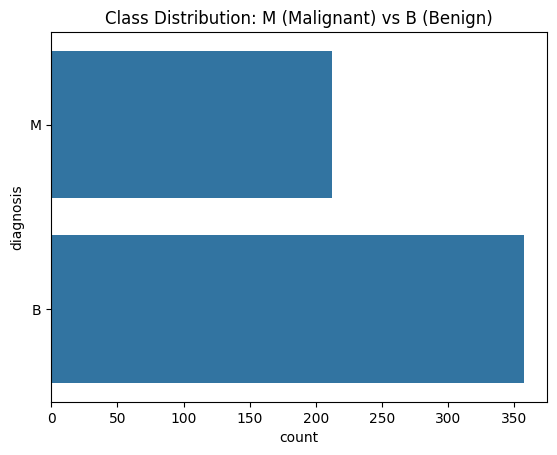

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of diagnosis
sns.countplot(df['diagnosis'])
plt.title('Class Distribution: M (Malignant) vs B (Benign)')
plt.show()


In [16]:
# encoding target variable

df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])  # M=1, B=0


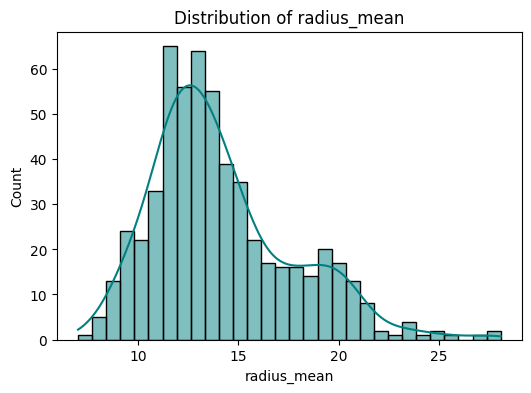

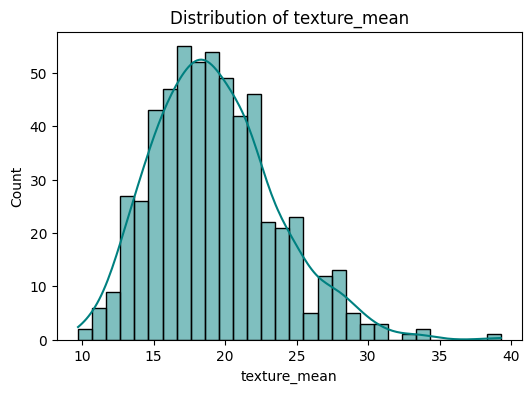

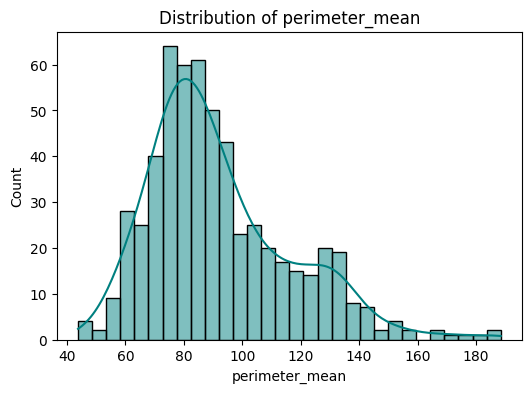

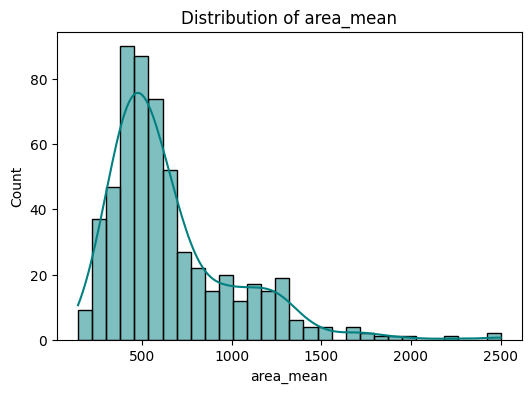

In [21]:
# Distribution plots of important features
important_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

for feature in important_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature], kde=True, bins=30, color='teal')
    plt.title(f'Distribution of {feature}')
    plt.show()


In [ ]:
'''
radius_mean : slightly right skewed
texture_mean : normal distribution
perimeter_mean : moderately right skewed
area_mean : right skewed
'''

<ipython-input-49-459dc7711111>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values[1:11], y=target_corr.index[1:11], palette='viridis')


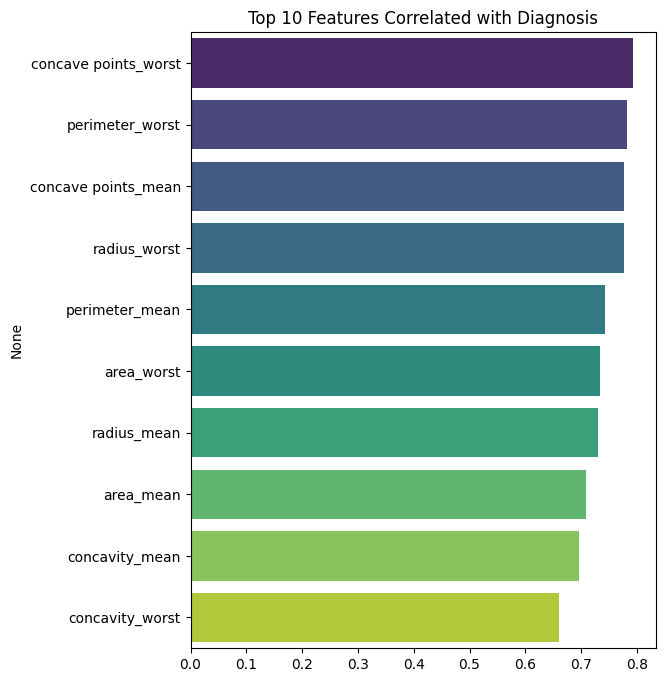

In [49]:
# Correlation with the target
target_corr = df.corr()['diagnosis'].sort_values(ascending=False)

# Plot top correlations
plt.figure(figsize=(6,8))
sns.barplot(x=target_corr.values[1:11], y=target_corr.index[1:11], palette='viridis')
plt.title("Top 10 Features Correlated with Diagnosis")
plt.show()


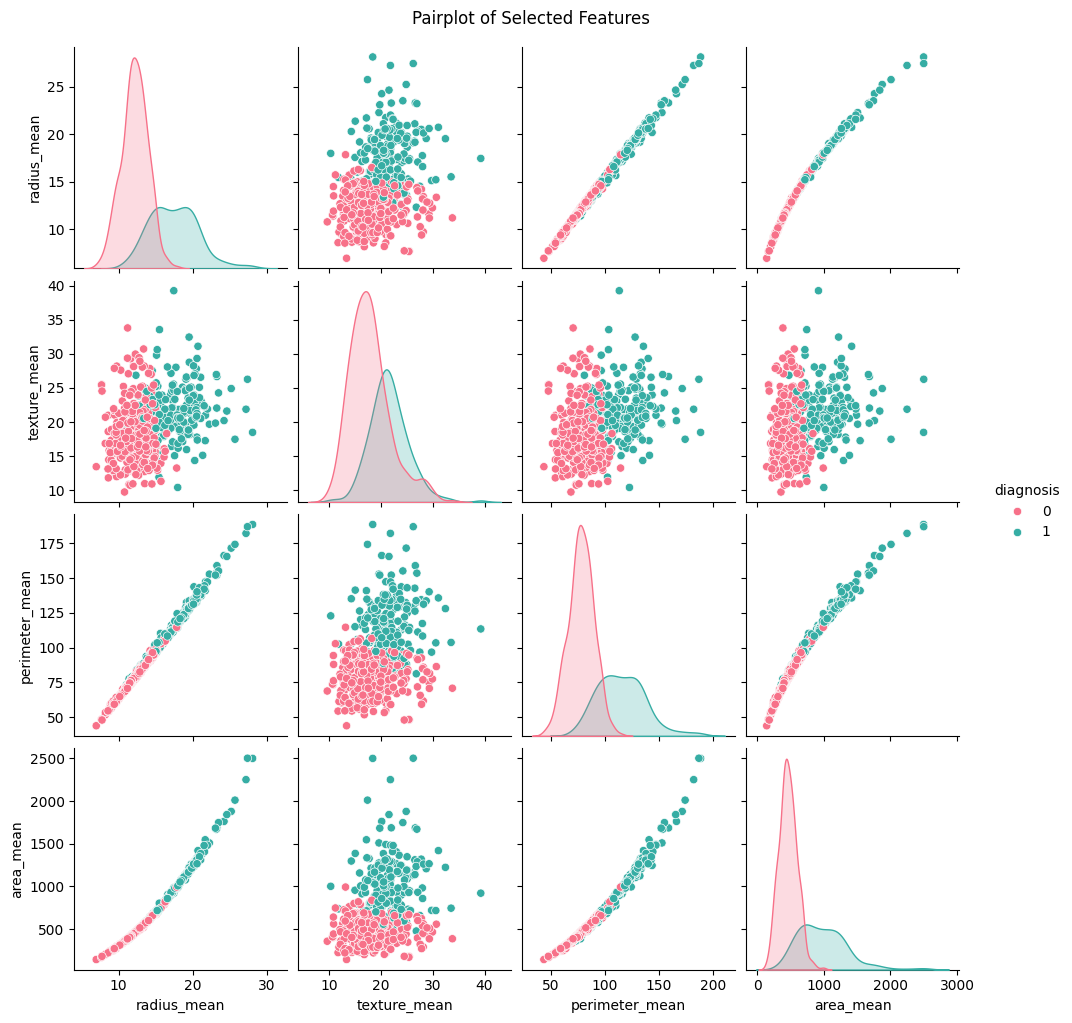

In [26]:
# A small subset of features for pairplot
sns.pairplot(df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']],
             hue='diagnosis', palette='husl')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


In [ ]:
'''
Features like area_mean, perimeter_mean, and radius_mean show strong class separation and high correlation.
texture_mean may be less relevant for classification
'''

In [27]:
# Split features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
# model design

model = Sequential([
    Dense(32, input_dim=X.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # sigmoid for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=16, verbose=1)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9979 - loss: 0.0260 - val_accuracy: 0.9890 - val_loss: 0.0727
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9855 - loss: 0.0805 - val_accuracy: 0.9890 - val_loss: 0.0734
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9932 - loss: 0.0367 - val_accuracy: 0.9890 - val_loss: 0.0742
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9930 - loss: 0.0309 - val_accuracy: 0.9890 - val_loss: 0.0723
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9869 - loss: 0.0332 - val_accuracy: 0.9890 - val_loss: 0.0737
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9934 - loss: 0.0268 - val_accuracy: 0.9890 - val_loss: 0.0732
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9877 - loss: 0.0599 - val_accuracy: 0.9890 - val_loss: 0.0738
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9764 - loss: 0.0622 - val_accuracy: 0.9890 - v

In [32]:
# Evaluate the model on testing dataset
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9794 - loss: 0.1429
Test Loss: 0.1072
Test Accuracy: 0.9825


In [ ]:
'''
Training Accuracy : 100%
Validation Accuracy : 96%
Model learns very well on training data.
Model generalizes well on unseen data.
'''

In [33]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step


In [35]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



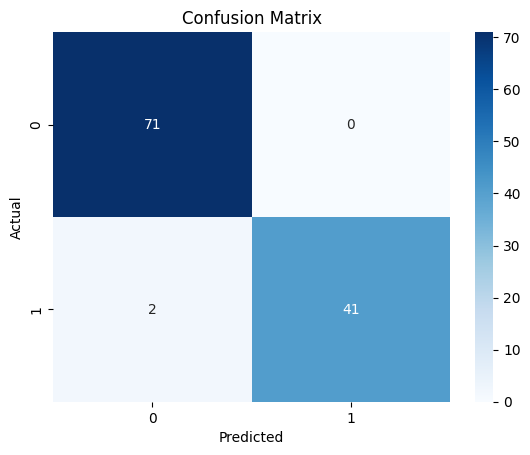

In [37]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
'''
True negatives - 71 (model correctly predicted class 0)
False positives - 0 (model incorrectly predicted class 1)
False negatives - 2 (model incorrectly predicted class 0 for class 1)
True positives - 41 (model correctly predicted class 1)
'''

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


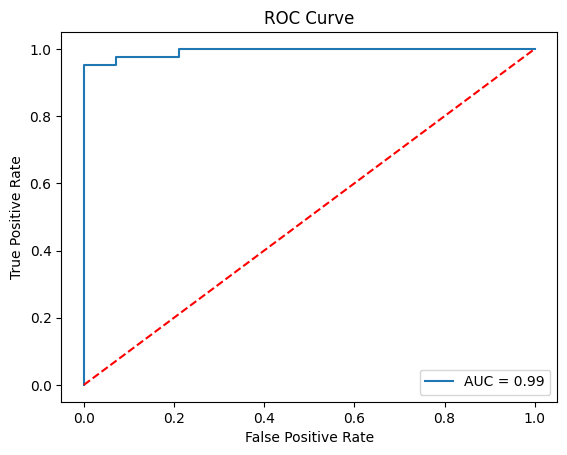

In [39]:
# ROC Curve
from sklearn.metrics import roc_curve, auc
y_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# AUC is 0.99 , which means model is perfectly distinguishes between classes malignant and benign.

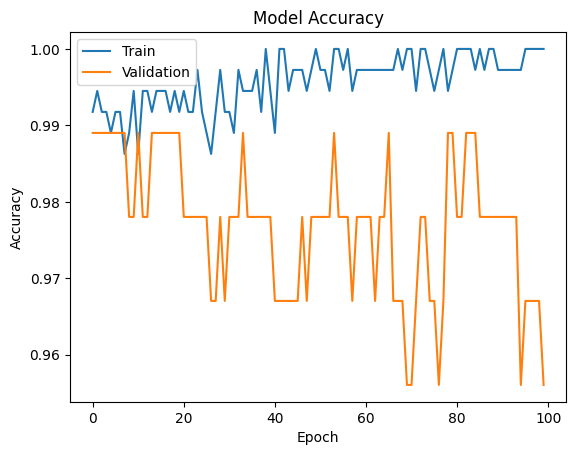

In [50]:
# Accuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


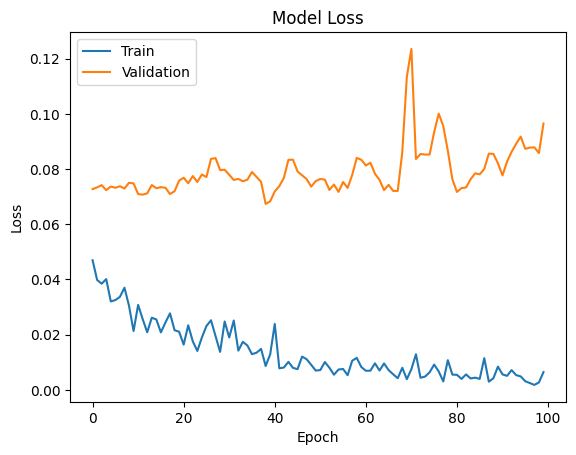

In [51]:
# Loss Plot

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [54]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
for train_idx, val_idx in kf.split(X_scaled):
    print(f"\nFold {fold}")
    X_train_cv, X_val_cv = X_scaled[train_idx], X_scaled[val_idx]
    y_train_cv, y_val_cv = y[train_idx], y[val_idx]

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train_cv.shape[1],)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_cv, y_train_cv, validation_data=(X_val_cv, y_val_cv),
              epochs=100, batch_size=32, verbose=1)

    score = model.evaluate(X_val_cv, y_val_cv, verbose=1)
    print(f"Validation Accuracy: {score[1]:.4f}")
    fold += 1



Fold 1
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5130 - loss: 0.7385 - val_accuracy: 0.7895 - val_loss: 0.4569
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7954 - loss: 0.4391 - val_accuracy: 0.9561 - val_loss: 0.3071
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8649 - loss: 0.3438 - val_accuracy: 0.9649 - val_loss: 0.2287
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9011 - loss: 0.2651 - val_accuracy: 0.9737 - val_loss: 0.1838
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9400 - loss: 0.1982 - val_accuracy: 0.9737 - val_loss: 0.1568
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9303 - loss: 0.1789 - val_accuracy: 0.9737 - val_loss: 0.1394
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9214 - loss: 0.1858 - val_accuracy: 0.9737 - val_loss: 0.1269
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9653 - loss: 0.1494 - val_accuracy: 0.9737 - val_l

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.3766 - loss: 0.8673 - val_accuracy: 0.7807 - val_loss: 0.5734
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7107 - loss: 0.5677 - val_accuracy: 0.9035 - val_loss: 0.3898
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8636 - loss: 0.4092 - val_accuracy: 0.9123 - val_loss: 0.2960
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9311 - loss: 0.3166 - val_accuracy: 0.9123 - val_loss: 0.2416
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9449 - loss: 0.2609 - val_accuracy: 0.9123 - val_loss: 0.2088
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9433 - loss: 0.2520 - val_accuracy: 0.9123 - val_loss: 0.1808
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9621 - loss: 0.1874 - val_accuracy: 0.9123 - val_loss: 0.1618
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9444 - loss: 0.1917 - val_accuracy: 0.9211 - val_l

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5122 - loss: 0.7618 - val_accuracy: 0.8333 - val_loss: 0.5516
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7724 - loss: 0.5123 - val_accuracy: 0.9035 - val_loss: 0.4079
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8918 - loss: 0.3516 - val_accuracy: 0.9035 - val_loss: 0.3300
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9082 - loss: 0.3071 - val_accuracy: 0.9386 - val_loss: 0.2788
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9049 - loss: 0.2797 - val_accuracy: 0.9386 - val_loss: 0.2431
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9265 - loss: 0.2285 - val_accuracy: 0.9561 - val_loss: 0.2190
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9350 - loss: 0.1894 - val_accuracy: 0.9737 - val_loss: 0.2004
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9356 - loss: 0.1867 - val_accuracy: 0.9737 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6437 - loss: 0.6546 - val_accuracy: 0.8947 - val_loss: 0.4693
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8210 - loss: 0.4364 - val_accuracy: 0.9298 - val_loss: 0.3401
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9118 - loss: 0.3198 - val_accuracy: 0.9649 - val_loss: 0.2692
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9175 - loss: 0.2913 - val_accuracy: 0.9825 - val_loss: 0.2276
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9306 - loss: 0.2238 - val_accuracy: 0.9825 - val_loss: 0.1966
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9275 - loss: 0.2098 - val_accuracy: 0.9825 - val_loss: 0.1736
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9572 - loss: 0.1816 - val_accuracy: 0.9825 - val_loss: 0.1561
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9422 - loss: 0.1718 - val_accuracy: 0.9912 - val_loss: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5166 - loss: 0.7424 - val_accuracy: 0.7168 - val_loss: 0.5523
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7747 - loss: 0.5261 - val_accuracy: 0.8761 - val_loss: 0.3905
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9078 - loss: 0.3743 - val_accuracy: 0.9204 - val_loss: 0.3041
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9168 - loss: 0.3005 - val_accuracy: 0.9381 - val_loss: 0.2529
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9306 - loss: 0.2581 - val_accuracy: 0.9469 - val_loss: 0.2204
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9437 - loss: 0.2142 - val_accuracy: 0.9469 - val_loss: 0.1988
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9531 - loss: 0.1853 - val_accuracy: 0.9558 - val_loss: 0.1822
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9505 - loss: 0.1810 - val_accuracy: 0.9558 - val_loss: 0.

In [56]:
# AUC score after k fold cross validation
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC Score:", auc_score)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
AUC-ROC Score: 0.9996724533245988
